In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
#reads the CSV file
df=pd.read_csv('data/Advertising.csv', index_col = 0)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
sel_program = 'radio'
X=df[[sel_program]]
Y=df['sales']
#using Z-score normalization standardize Y
Y=np.array((Y-Y.mean())/Y.std())
#print(Y)
#X = np.array((X-X.mean())/X.std())
#using Z-score normalization standardize X with  pandas-friendly syntax
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [7]:
def initialize(dim):
    #random float between 0.0 and 1.0
    b=random.random()
    #random floats in [0.0, 1.0) NumPy array of shape (dim,)
    a=np.random.rand(dim)
    #return tuple
    return b,a

In [8]:
def predict_Y(b,a,X):
    #b bias(intercept)
    #a: weight vector (coefficients)
    #X: input data (1D or 2D array of features)
    #return predict Y values
    return b + np.dot(X,a)

In [9]:
def get_cost(Y,Y_hat):
    #Y Actual value
    #Y_hat predicted value
    Y_resd=Y-Y_hat #Residuals(errors)
    #Sum of squared errors np.dot(Y_resd.T,Y_resd)
    #Mean squared error len(Y)
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [10]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [ ]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    #If the cost change is smaller than this, training stops early (convergence check).
    tolerance = 1e-06
    # Randomly initializes the bias b and weights θ.
    b,theta=initialize(X.shape[1]) #Number of features (dimensions) → for how many weights to generate
    
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0 
    #Runs up to num_iterations, or stops early if the cost stops improving significantly
    for iter_num in range(num_iterations):
        #Predict with current parameters
        Y_hat=predict_Y(b,theta,X)
        #Compute the cost (error)
        this_cost=get_cost(Y,Y_hat)
        #Save current values
        prev_b=b
        prev_theta=theta
        #Update weights and bias using gradient descent
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        #Store this step’s data
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1  
        #Early stopping 
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        #Update previous cost
        prev_cost = this_cost
    return gd_iterations_df,b,theta

#Tune Learning Rate A higher value may converge faster, while a lower value might give better precision. 
# 0.001, 0.01, 0.05, 0.1    
# Increase num_iterations
# if your loss is still improving, increasing this can help:  
# monitor the cost column — if it's still decreasing, you haven't hit the best point yet
#gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=40000)
#gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.000001,num_iterations=400)
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.1,num_iterations=400)

print(gd_iterations_df)

    iteration   value_b  value_weight      cost
0         0.0  0.687967      0.475847  1.419782
1         1.0  0.550374      0.495821  1.147952
2         2.0  0.440299      0.511821  0.973971
3         3.0  0.352239      0.524637  0.862618
4         4.0  0.281791      0.534903  0.791348
5         5.0  0.225433      0.543125  0.745733
6         6.0  0.180347      0.549712  0.716538
7         7.0  0.144277      0.554987  0.697852
8         8.0  0.115422      0.559213  0.685892
9         9.0  0.092337      0.562598  0.678238
10       10.0  0.073870      0.565309  0.673339
11       11.0  0.059096      0.567481  0.670203
12       12.0  0.047277      0.569221  0.668196
13       13.0  0.037821      0.570614  0.666912
14       14.0  0.030257      0.571730  0.666089
15       15.0  0.024206      0.572624  0.665563
16       16.0  0.019365      0.573340  0.665227
17       17.0  0.015492      0.573914  0.665011
18       18.0  0.012393      0.574373  0.664873
19       19.0  0.009915      0.574741  0

In [31]:
#sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [50]:
#Finds the index (iteration) where the cost is lowest (i.e., best fit)
idx = gd_iterations_df['cost'].argmin() #argmin() returns the index of the minimum value in the cost column.
print(idx)
#Uses that idx to get the values of bias (value_b) and weight (value_weight) at that best iteration
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight', 'cost']] #loc[idx, ...] accesses the row at that iteration index.
print(best_parameters)
best_parameters['value_weight']


30
value_b         0.000902
value_weight    0.576211
cost            0.664629
Name: 30, dtype: float64


np.float64(0.5762108531306419)

In [46]:
#This x will be used to make predictions.
x = df[sel_program]
#initial model line (likely a poor fit)
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
#best learned line (should fit the data well)
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

In [55]:
import numpy as np
#computes the predicted values from the best model: y^=b+θ⋅X
y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X
#calculates the Mean Absolute Error (MAE) average absolute difference
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
#print selected features, Mean Absolute Error (MAE), MSE (Mean Squared Error) average squared difference
print(sel_program, error, get_cost(Y, y_p[sel_program]))
#This tells you how many predictions are noticeably inaccurate.
np.sum(((np.abs(Y- y_p[sel_program]))>0.5))


radio 0.6362600082193312 0.6646284487196857


np.int64(100)

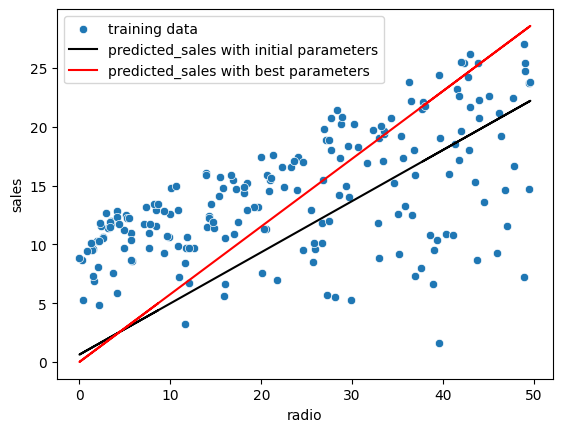

In [56]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()